# Chapter 3: Classification

<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/BUFONJOKER/hands-on-ml-ch3/blob/master/main.ipynb" target="_parent">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"
      style="height:80px; width:auto;"/>
    </a>
  </td>
</table>



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import (
    precision_score,
    recall_score,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
)


## MNIST Dataset

In [2]:
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', as_frame=False)


In [3]:
# create folder if it doesnot exist
# os.makedirs('dataset',exist_ok=True)
# X = mnist.data
# y = mnist.target
# np.savez_compressed('dataset/mnist.npz',X=X, y=y)

In [2]:
mnist = np.load('dataset/mnist.npz', allow_pickle=True)

In [3]:
X = mnist['X']
y = mnist['y']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

Function to Plot Image

In [10]:
def plot_image(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

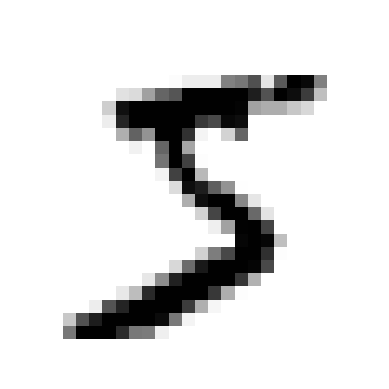

In [11]:
plot_image(X[0])
plt.show()

In [12]:
y[0]

'5'

In [13]:
type(y[0])

str

In [14]:
type(X[0])

numpy.ndarray

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test.shape

(10000, 784)

In [18]:
y_train.shape

(60000,)

In [19]:
y_test.shape

(10000,)

## Training a Binary Classifier

In [20]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [21]:
y_train_5

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [22]:
y_test_5

array([False, False, False, ..., False,  True, False], shape=(10000,))

In [ ]:

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [24]:
some_digit = np.array([1] + [0]*783).reshape(1, -1)
sgd_clf.predict(some_digit)

array([ True])

## Performance Measures

In [ ]:

cross_val_score(
    sgd_clf, X_train, y_train_5,
     cv=3,scoring='accuracy'
)

array([0.95035, 0.96035, 0.9604 ])

In [ ]:

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [27]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

## Confusion Matrices

In [ ]:

y_train_pred = cross_val_predict(
    sgd_clf,X_train,y_train_5,cv=3
)

In [29]:
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [ ]:

cm = confusion_matrix(y_train_5, y_train_pred)

In [31]:
cm

array([[53892,   687],
       [ 1891,  3530]])

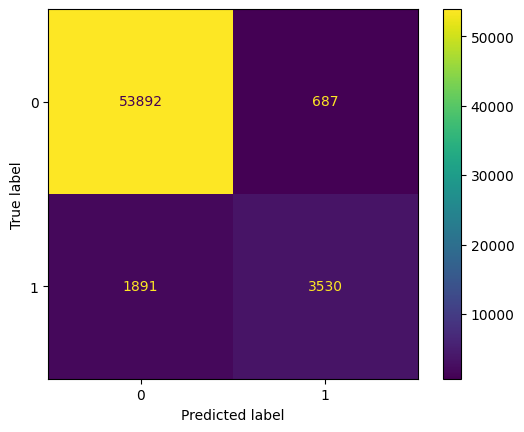

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [33]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

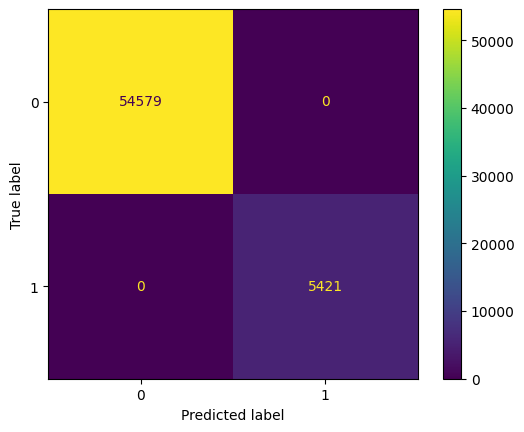

In [34]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_train_5,y_train_5)
).plot()
plt.show()

In [ ]:

precision = precision_score(y_train_5, y_train_pred)
print(f"Precision = {precision * 100:.2f}%")

Precision = 83.71%


In [36]:
recall = recall_score(y_train_5, y_train_pred)
print(f"Recall = {recall * 100:.2f}%")

Recall = 65.12%


In [ ]:

f1 = f1_score(y_train_5, y_train_pred)
print(f"F1 Score = {f1 * 100:.2f}%")

F1 Score = 73.25%


In [38]:
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3,
    method='decision_function'
)

In [39]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

In [ ]:

precisions, recalls, thresholds = precision_recall_curve(
    y_train_5,y_scores
)

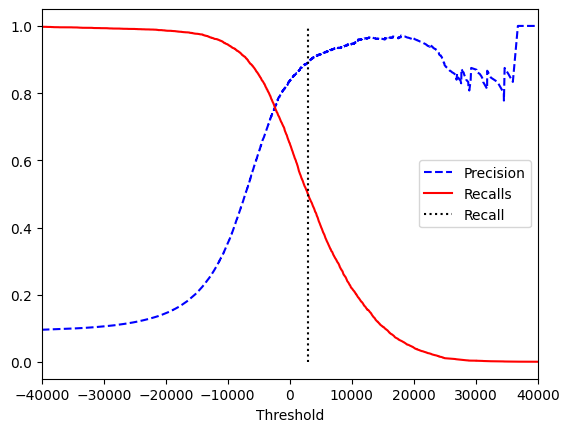

In [41]:
plt.plot(
    thresholds,
    precisions[:-1],
    "b--",
    label='Precision'
)
plt.plot(
    thresholds,
    recalls[:-1],
    "r-",
    label='Recalls'
)
plt.vlines(3000,0,1.0,"k","dotted",label='Recall')
plt.legend()
plt.xlim(-40000,40000)
plt.xlabel("Threshold")
plt.show()

In [42]:
# threshold = 3000
# plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
# plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
# plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
# plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# # extra code – this section just beautifies and saves Figure 3–5
# idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
# plt.plot(thresholds[idx], precisions[idx], "bo")
# plt.plot(thresholds[idx], recalls[idx], "go")
# plt.axis([-50000, 50000, 0, 1])
# plt.grid()
# plt.xlabel("Threshold")
# plt.legend(loc="center right")

# plt.show()

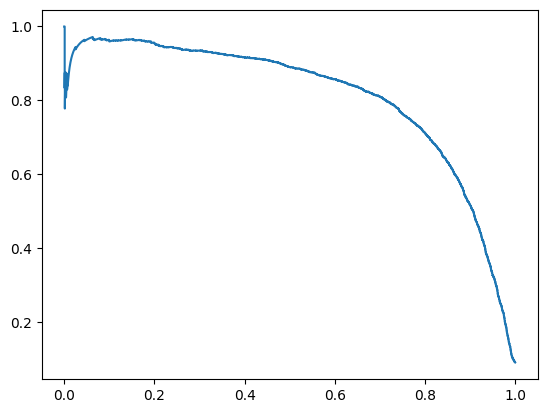

In [43]:
plt.plot(recalls,precisions)
plt.show()

In [44]:
idx_for_90_precision = (precisions>=0.90).argmax()

In [45]:
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [46]:
precisions>=0.90

array([False, False, False, ...,  True,  True,  True], shape=(60001,))

In [47]:
y_train_pred_90 = (y_scores>=threshold_for_90_precision)

In [48]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [49]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [50]:
confusion_matrix(y_train_5,y_train_pred_90)

array([[54290,   289],
       [ 2819,  2602]])

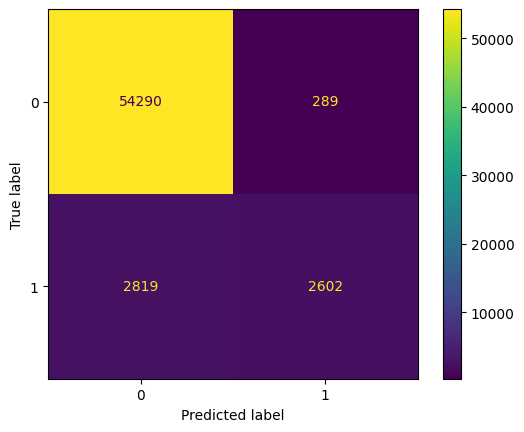

In [51]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train_5,y_train_pred_90)
).plot()
plt.show()

In [ ]:

accuracy_score(y_train_5,y_train_pred)

0.9570333333333333

In [53]:
np.unique_counts(y_train_5)

UniqueCountsResult(values=array([False,  True]), counts=array([54579,  5421]))

In [54]:
y_train_5

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [ ]:

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

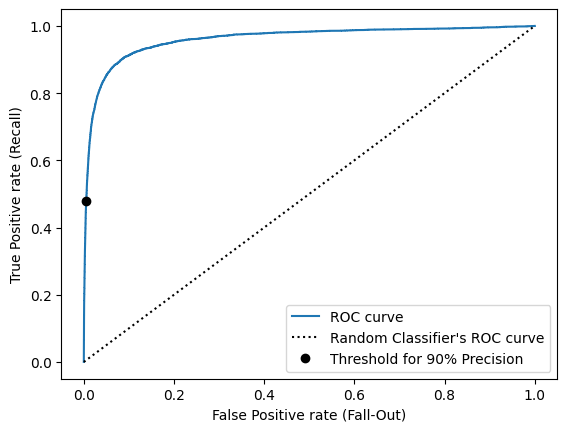

In [56]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:',
label="Random Classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko",
label = "Threshold for 90% Precision"
)
plt.xlabel("False Positive rate (Fall-Out)")
plt.ylabel("True Positive rate (Recall)")
plt.legend()
plt.show()

In [ ]:

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:

forest_clf = RandomForestClassifier(random_state=42)

In [59]:
y_probas_forest = cross_val_predict(
    forest_clf, X_train, y_train_5, 
    cv=3, method="predict_proba"
)

In [61]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [63]:
y_scores_forest = y_probas_forest[:,1]
precision_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest
)

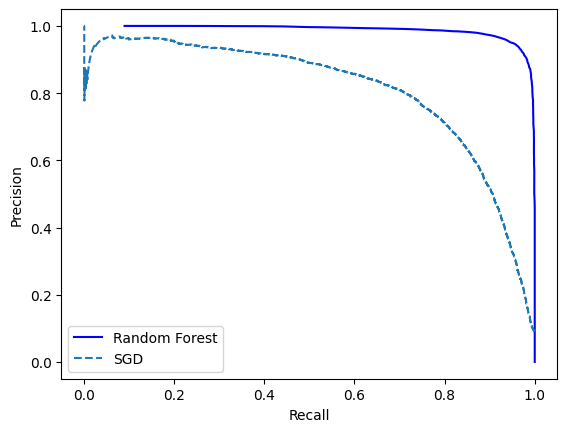

In [65]:
plt.plot(precision_forest, recalls_forest, "b-",
label="Random Forest")
plt.plot(recalls, precisions,'--',label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [68]:
y_train_pred_forest = y_probas_forest[:,1]>=0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [70]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [71]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [72]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

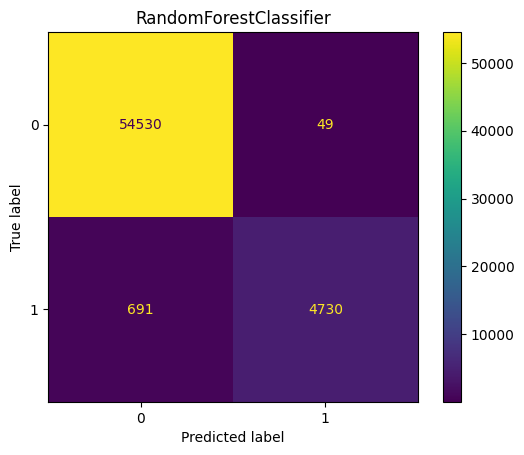

In [76]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_train_5,y_train_pred_forest
        )
).plot()
plt.title("RandomForestClassifier")
plt.show()

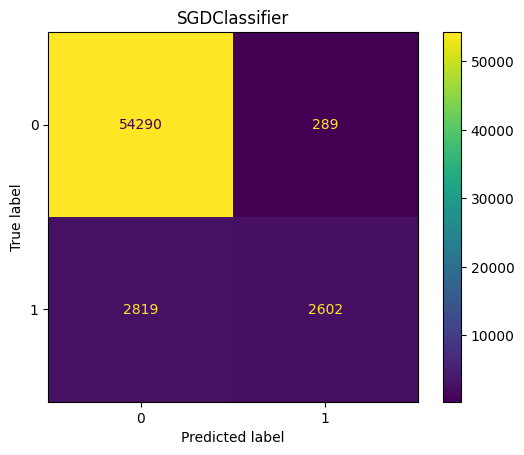

In [77]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train_5,y_train_pred_90)
).plot()
plt.title("SGDClassifier")
plt.show()

## Multiclass Classification

In [6]:

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [86]:
svm_clf.predict(some_digit)

array(['1'], dtype=object)

In [87]:
some_digit_scores = svm_clf.decision_function(some_digit)

In [94]:
svm_clf.classes_[svm_clf.decision_function(some_digit).argmax()]

'1'

In [ ]:

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])


,estimator,SVC(random_state=42)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [97]:
ovr_clf.predict(some_digit)

array(['1'], dtype='<U1')

In [99]:
ovr_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [100]:
some_digit_ovr_clf_scores = ovr_clf.decision_function(some_digit)

In [101]:
some_digit_ovr_clf_scores

array([[-1.13559814, -0.10717649, -1.0512457 , -1.3826536 , -0.96381946,
        -0.81987298, -0.8103347 , -0.7677297 , -1.74956164, -1.91868139]])

In [103]:
len(ovr_clf.estimators_)

10

In [105]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [108]:
X_train.shape

(60000, 784)

In [109]:
y_train.shape

(60000,)

In [111]:
sgd_clf.decision_function(some_digit)

array([[ -214.23804761,   -31.47820709,  -243.39283758,  -412.61204135,
         -161.56175199,   103.02146015,  -245.40214746,   -32.70213188,
        -1297.23305113,  -570.06078343]])

In [116]:
sgd_clf.predict([X[1]])

array(['0'], dtype='<U1')

In [122]:
cross_val_score(
    sgd_clf, X_train, y_train, cv=3,scoring='accuracy'
)

array([0.87365, 0.85835, 0.8689 ])

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [ ]:
cross_val_score(
    sgd_clf, X_train_scaled, y_train, cv=3,scoring='accuracy'
)

In [ ]:
y_train_pred = cross_val_predict(
    sgd_clf, X_train_scaled, y_train, cv=3
)
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred
)
plt.show()